## **About company**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

## **Problem Statement**
You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('scaler_clustering.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


Column Profiling:
- ‘Unnamed 0’- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

### Checking basic characteristics:

In [3]:
print('No.of Rows:', df.shape[0])
print('No.of Columns:', df.shape[1])

No.of Rows: 205843
No.of Columns: 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [5]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [6]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [7]:
# Checking no.of unique values in each feature.

df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [9]:
# Finding out the percentage of null values for each feature.

np.round((df.isnull().sum()/df.shape[0])*100,2)

Unnamed: 0           0.00
company_hash         0.02
email_hash           0.00
orgyear              0.04
ctc                  0.00
job_position        25.54
ctc_updated_year     0.00
dtype: float64

The dataset has null values in the columns company_hash, orgyear and job_position.

In [10]:
# 'Unnamed:0' has Index of the dataset. So this column can be dropped.

df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [11]:
df['job_position'].nunique()

1016

In [12]:
df['ctc_updated_year'].value_counts()

ctc_updated_year
2019.0    68688
2021.0    64976
2020.0    49444
2017.0     7561
2018.0     6746
2016.0     5501
2015.0     2927
Name: count, dtype: int64

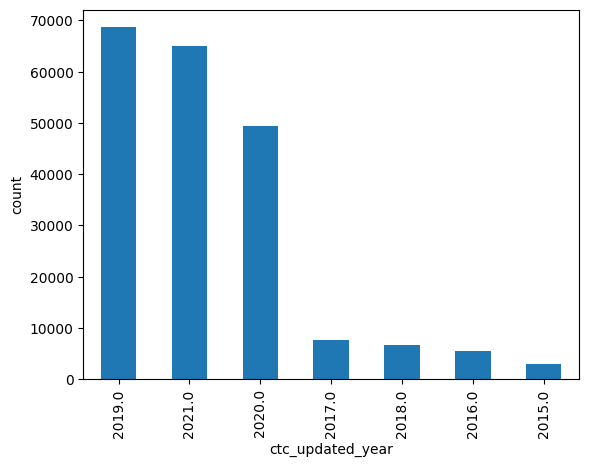

In [13]:
df['ctc_updated_year'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.show()

In [14]:
df['email_hash'].value_counts().head(10)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
Name: count, dtype: int64

- It can be observed that certain email IDs are repeating several times in the dataset.

## Data Pre-processing

Let's remove special characters(if any) in the text columns using Regex.

In [15]:
import re

# Let's create a function to remove any special characters in the text columns.
def special_char_removal(string):
    re.sub('[^A-Za-z0-9 ]+', '', string)
    return string

In [16]:
# Let's remove any special charachters in the columns 'company_hash', 'job_position' and 'email_hash'.

df['company_hash'] = df['company_hash'].astype('str').apply(lambda x: special_char_removal(x).lower().strip())
df['job_position'] = df['job_position'].astype('str').apply(lambda x: special_char_removal(x).lower().strip())
df['email_hash'] = df['email_hash'].astype('str').apply(lambda x: special_char_removal(x).lower().strip())

In [17]:
df['email_hash'].nunique()

153443

In [18]:
df.drop(columns='email_hash',axis=1,inplace=True)

In [19]:
df.shape

(205843, 5)

In [20]:
df.drop_duplicates(inplace=True)
df.shape

(188260, 5)

In [21]:
df['company_hash'].nunique()

37300

In [22]:
df['job_position'].nunique()

912

In [23]:
df['company_hash'].value_counts()

company_hash
nvnv wgzohrnvzwj otqcxwto      4284
xzegojo                        3043
vbvkgz                         3005
wgszxkvzn                      2263
zgn vuurxwvmrt vwwghzn         2208
                               ... 
ahmvx ugrxwt yi                   1
ouqgvx ogenfvqt                   1
vkhqt pzgfrtast wgqugqvnxgz       1
svrrtqx5 ntwyzgrgsxto             1
yga xzzgcvnxgz rvm ucn rna        1
Name: count, Length: 37300, dtype: int64

In [24]:
df.isnull().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

### Null value imputation using median values for 'orgyear'

In [25]:
company_median_orgyear = df.groupby('company_hash')['orgyear'].median()

In [26]:
# Creating a function to impute null values.
def null_imputation(data, main_col, null_col):
    if np.isnan(null_col):
        return data[main_col]
    else:
        return null_col
   

df['orgyear']=df.apply(lambda x: null_imputation(company_median_orgyear,x['company_hash'],x['orgyear'] ), axis=1)    

In [27]:
df['orgyear'].isnull().sum()

np.int64(26)

- Even after filling the null values using the median values of the respective companies, some null values still remain.

In [28]:
# Let's drop the rows with any null values.
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188234 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      188234 non-null  object 
 1   orgyear           188234 non-null  float64
 2   ctc               188234 non-null  int64  
 3   job_position      188234 non-null  object 
 4   ctc_updated_year  188234 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ MB


In [31]:
df['orgyear']= df['orgyear'].astype(int)
df['ctc_updated_year']= df['ctc_updated_year'].astype(int)

#### Removing outliers in 'orgyear'

In [32]:
df['orgyear'].unique()

array([ 2016,  2018,  2015,  2017,  2019,  2020,  2012,  2013,  2003,
        2006,  2014,  2011,  2021,  2008,  2004,  2022,  2009,  2005,
        2010,  2007,  2000,  2002,  2023,  2001,  1981,  2031,  2024,
        1996,  1999,  2106,  1997,  1994,  1995,  1992,  1973,  1991,
        1998,  1990,  1993,  1988,  2025,  2029,     0,   208,  1985,
         209,   206,  1982,  2026,  1970,  2101,  1972,  2107,  1986,
        1989,    91,  1987,     3,  2027,     2,  1976,     4,     5,
        1971,  1977,  1984,    83,     1,  1979,  2028,  2204,    38,
        1900,   201,     6, 20165,   200])

In [33]:
df.shape

(188234, 5)

- There are some values in orgyear which are not possible like 0,208,4,5 etc..
- So, let's remove the rows that has orgyear less than 1970 and greater than 2024.

In [34]:
df= df[(df['orgyear'] >= 1970) & (df['orgyear'] <= 2024)]

In [35]:
df.shape

(188148, 5)

In [36]:
df['orgyear'].describe()

count    188148.000000
mean       2014.870533
std           4.284556
min        1970.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2024.000000
Name: orgyear, dtype: float64

In [37]:
df[df.duplicated()]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
204744,vbvkgz,2016,2500000,nan,2020


In [38]:
df.drop_duplicates(inplace=True)
df.shape

(188147, 5)

### Masking the companies that appeared less than 6 times by renaming them as 'others'

In [39]:
df.company_hash.value_counts()

company_hash
nvnv wgzohrnvzwj otqcxwto     4284
xzegojo                       3040
vbvkgz                        3004
wgszxkvzn                     2262
zgn vuurxwvmrt vwwghzn        2205
                              ... 
pzhastbt tdqhzzq                 1
mtqptrtj rvm                     1
bvszgz tsurho ucn rna            1
bvuihton                         1
nyxzsfgqd v unw ntwyzgrgsj       1
Name: count, Length: 37249, dtype: int64

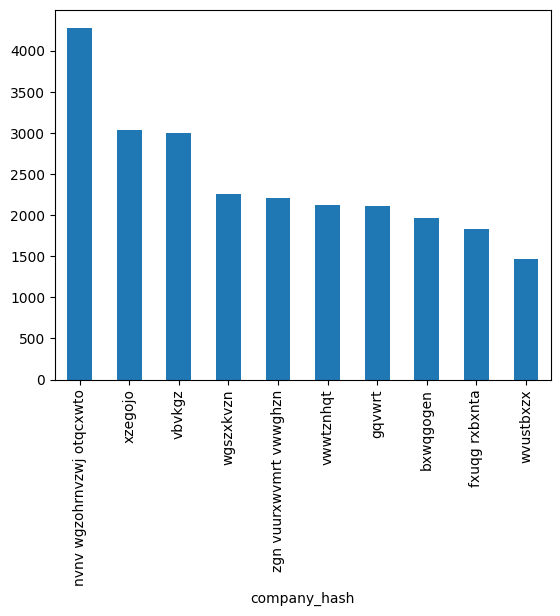

In [40]:
df.company_hash.value_counts().head(10).plot(kind='bar')
plt.show()

In [41]:
# Count the occurrences of each company
company_counts = df['company_hash'].value_counts()

# Identify companies with less than 6 appearances
companies_to_replace = company_counts[company_counts <= 5].index

# Replace these companies with 'others'
df['company_hash'] = df['company_hash'].replace(companies_to_replace, 'others')

In [42]:
df['company_hash'].value_counts()

company_hash
others                       50851
nvnv wgzohrnvzwj otqcxwto     4284
xzegojo                       3040
vbvkgz                        3004
wgszxkvzn                     2262
                             ...  
guwxng                           6
lrn                              6
wqguxz                           6
xzzgatta ojontbo ucn rna         6
trrxt bvt                        6
Name: count, Length: 3153, dtype: int64

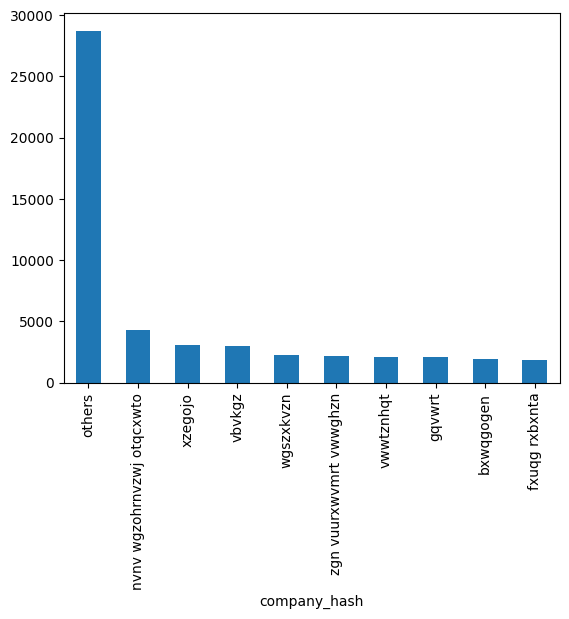

In [149]:
df.company_hash.value_counts().head(10).plot(kind='bar')
plt.show()

- This shows that there are many companies with less than 5 appearances.

In [43]:
df[df.duplicated()]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
232,others,2019,200000,fullstack engineer,2019
238,others,2016,600000,fullstack engineer,2019
853,others,2018,300000,nan,2020
969,others,2016,280000,other,2020
1029,others,2017,300000,other,2020
...,...,...,...,...,...
205716,others,2013,1600000,nan,2020
205717,others,2013,1100000,nan,2019
205722,others,2015,940000,nan,2019
205815,others,2015,2400000,nan,2019


In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.shape

(166132, 5)

### Creating ‘Years of Experience’ feature:

In [46]:
df['years_of_exp'] = 2024 - df['orgyear']

In [47]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_exp
0,atrgxnnt xzaxv,2016,1100000,other,2020,8
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019,6
2,others,2015,2000000,backend engineer,2020,9
3,ngpgutaxv,2017,700000,backend engineer,2019,7
4,qxen sqghu,2017,1400000,fullstack engineer,2019,7
...,...,...,...,...,...,...
205838,vuurt xzw,2008,220000,nan,2019,16
205839,husqvawgb,2017,500000,nan,2020,7
205840,vwwgrxnt,2021,700000,nan,2021,3
205841,zgn vuurxwvmrt,2019,5100000,nan,2019,5


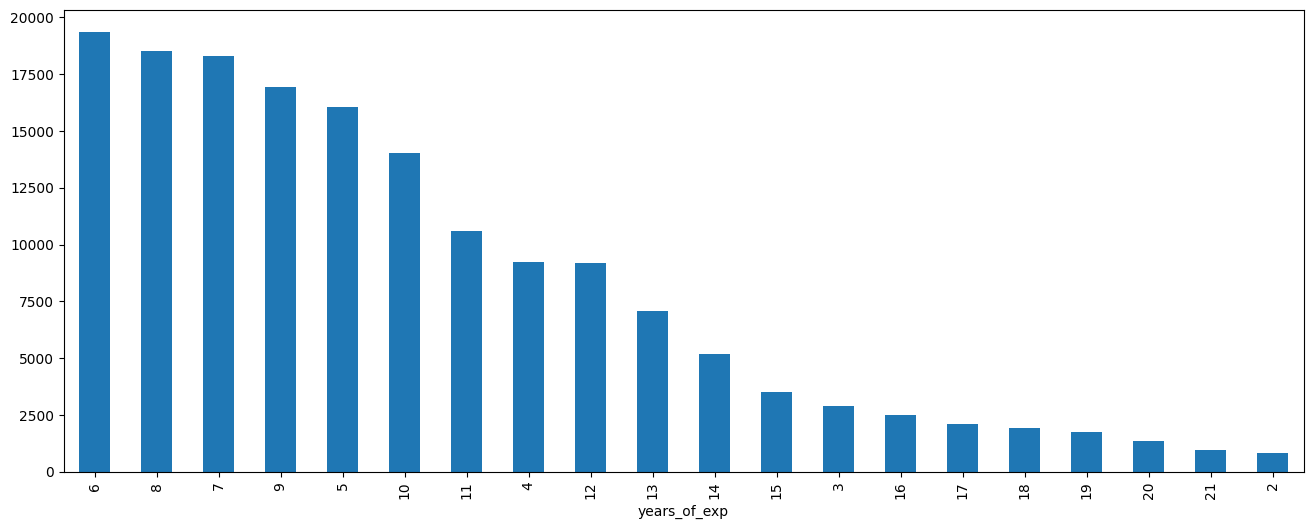

In [153]:
df.years_of_exp.value_counts().head(20).plot(kind='bar',figsize=(16,6))
plt.show()

#### Feature: Job position

In [48]:
df['job_position'].unique()

array(['other', 'fullstack engineer', 'backend engineer', 'nan',
       'ios engineer', 'data analyst', 'frontend engineer', 'qa engineer',
       'engineering leadership', 'data scientist', 'engineering intern',
       'android engineer', 'research engineers', 'sdet',
       'support engineer', 'security leadership', 'devops engineer',
       'product manager', 'program manager', 'co-founder',
       'member of technical staff 3', 'product designer',
       'system engineer', 'backend architect', 'database administrator',
       'senior  software engineer', 'release engineer', 'ase',
       'non coder', 'trainer', 'associate consultant', 'administrator',
       'software development engineer 2', 'sr.', 'sr. executive',
       'software engineer (android)', 'owner',
       'tool room engineer, mechanical engineer', 'senior data scientist',
       'sde 2', 'project engineer', 'mean stack developer',
       'software development engineer - i', 'sde-3', 'digital marketing',
       'app de

- There are different job positions for similar roles and also, there are very small spelling differences in certain job positions.
- We need to clean up our job titles to avoid duplicates and fix minor spelling differences.
- Let's use an Excel file with the correct job titles to update and rename the positions.

In [49]:
job_position_map=pd.read_csv('scaler_job_positions_mapping.csv')

In [50]:
job_position_map.head(20)

,Original,New
0,7,others
1,91,others
2,737,others
3,857628,others
4,896651,others
5,a group chat application,others
6,abap developer,abap developer
7,account,account
8,administrative clerk,administrative clerk
9,administrator,administrator


In [51]:
job_position_map[job_position_map.duplicated()]

,Original,New
382,NaN,others
800,NaN,others


In [52]:
job_position_map.shape

(801, 2)

In [53]:
job_position_map.drop_duplicates(inplace = True)
job_position_map.shape

(799, 2)

In [54]:
df=df.merge(job_position_map, left_on='job_position', right_on='Original', how='left')

In [55]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_exp,Original,New
0,atrgxnnt xzaxv,2016,1100000,other,2020,8,other,others
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,fullstack engineer,2019,6,fullstack engineer,fullstack devloper
2,others,2015,2000000,backend engineer,2020,9,backend engineer,backend engineer
3,ngpgutaxv,2017,700000,backend engineer,2019,7,backend engineer,backend engineer
4,qxen sqghu,2017,1400000,fullstack engineer,2019,7,fullstack engineer,fullstack devloper


In [56]:
df.isnull().sum()

company_hash            0
orgyear                 0
ctc                     0
job_position            0
ctc_updated_year        0
years_of_exp            0
Original            37829
New                 37829
dtype: int64

In [57]:
df.drop(columns=['Original'],inplace=True)

In [58]:
# Replacing null values in 'New' column with corresponding values from 'job_position' column
df['New'] = df['New'].fillna(df['job_position'])

In [59]:
df.drop(columns=['job_position'],inplace=True)

In [60]:
df = df.rename(columns={'New': 'job_position'})

In [61]:
df.isnull().sum()

company_hash        0
orgyear             0
ctc                 0
ctc_updated_year    0
years_of_exp        0
job_position        0
dtype: int64

In [62]:
df[df.duplicated]

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position
4301,others,2018,200000,2021,6,others
4683,nyxzp rtvqz ucn rna mjlho,2019,800000,2021,5,others
6201,fxuqg rxbxnta,2019,500000,2021,5,others
13322,zgn vuurxwvmrt vwwghzn,2020,100000,2021,4,others
14319,zgn vuurxwvmrt vwwghzn,2020,300000,2021,4,others
...,...,...,...,...,...,...
153799,nvnv wgzohrnvzwj otqcxwto,2020,330000,2019,4,others
160034,rn ntwyzgrgsj otqcxwto rxbxnta,2015,670000,2021,9,others
164161,ytfrtnn uvwpvqa tzntquqxot,2016,200000,2021,8,others
165626,others,2020,240000,2021,4,others


In [63]:
df.drop_duplicates(inplace=True)

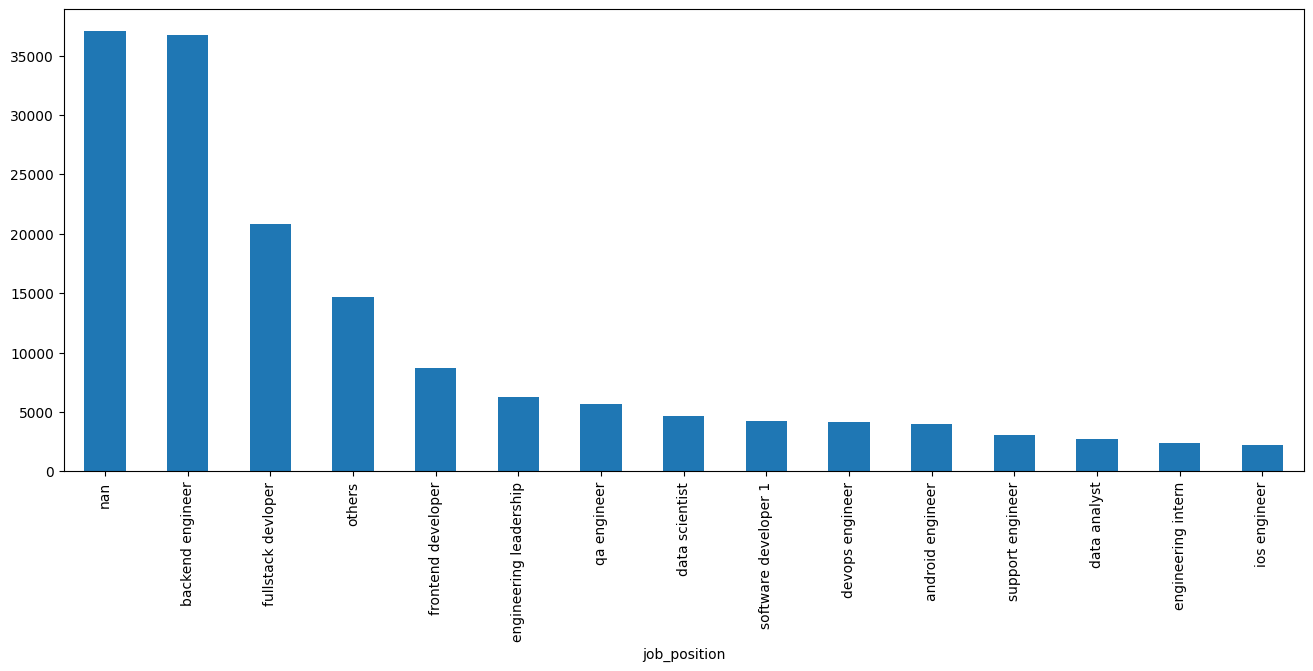

In [154]:
df['job_position'].value_counts().head(15).plot(kind= 'bar', figsize= (16,6))
plt.show()

## Manual Clustering

### Manual Clustering on the basis of learner’s company, job position and years of experience and creating 'Designation' feature:

In [64]:
grouped_c_j_exp = df.groupby(['company_hash','job_position','years_of_exp'])['ctc'].describe()
grouped_c_j_exp

count          mean  \
company_hash job_position              years_of_exp                        
1bs          android engineer          5               1.0  6.000000e+05   
                                       6               1.0  9.000000e+05   
                                       7               1.0  7.000000e+05   
             backend engineer          5               3.0  1.116667e+06   
                                       6               3.0  9.333333e+05   
...                                                    ...           ...   
zxztrtvuo    nan                       9               2.0  1.850000e+06   
                                       10              1.0  1.275000e+06   
             others                    4               1.0  4.500000e+05   
                                       5               1.0  4.500000e+05   
             software developer intern 8               1.0  1.200000e+06   

                                                               std        min  \
company_hash job_position              years_of_exp                             
1bs          android engineer          5                       NaN   600000.0   
                                       6                       NaN   900000.0   
                                       7                       NaN   700000.0   
             backend engineer          5             202072.594216  1000000.0   
                                       6             152752.523165   800000.0   
...                                                            ...        ...   
zxztrtvuo    nan                       9             919238.815543  1200000.0   
                                       10                      NaN  1275000.0   
             others                    4                       NaN   450000.0   
                                       5                       NaN   450000.0   
             software developer intern 8                       NaN  1200000.0   

                                                           25%        50%  \
company_hash job_position              years_of_exp                         
1bs          android engineer          5              600000.0   600000.0   
                                       6              900000.0   900000.0   
                                       7              700000.0   700000.0   
             backend engineer          5             1000000.0  1000000.0   
                                       6              850000.0   900000.0   
...                                                        ...        ...   
zxztrtvuo    nan                       9             1525000.0  1850000.0   
                                       10            1275000.0  1275000.0   
             others                    4              450000.0   450000.0   
                                       5              450000.0   450000.0   
             software developer intern 8             1200000.0  1200000.0   

                                                           75%        max  
company_hash job_position              years_of_exp                        
1bs          android engineer          5              600000.0   600000.0  
                                       6              900000.0   900000.0  
                                       7              700000.0   700000.0  
             backend engineer          5             1175000.0  1350000.0  
                                       6             1000000.0  1100000.0  
...                                                        ...        ...  
zxztrtvuo    nan                       9             2175000.0  2500000.0  
                                       10            1275000.0  1275000.0  
             others                    4              450000.0   450000.0  
                                       5              450000.0   450000.0  
             software developer intern 8             1200000.0  1200000.0  

[64172 rows x 8 col

In [65]:
df_cjy=df.merge(grouped_c_j_exp, on=['company_hash','job_position','years_of_exp'], how='left')

In [66]:
df_cjy.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,others,2015,2000000,2020,9,backend engineer,483.0,1.756078e+06,6.676685e+06,1000.0,350000.0,860000.0,1600000.0,100420000.0
3,ngpgutaxv,2017,700000,2019,7,backend engineer,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0


In [67]:
df_cjy[df_cjy.duplicated]

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,count,mean,std,min,25%,50%,75%,max


In [68]:
df_cjy.drop_duplicates(inplace=True)

#### Creating 'designation' feature

In [69]:
def assign_designation(value,value_50,value_75):
    if value>= value_75:
        return 1
    elif value< value_50:
        return 3
    else:
        return 2

In [70]:
df_cjy['Designation'] = df_cjy.apply(lambda x:assign_designation(x['ctc'],x['50%'],x['75%']),axis=1)

In [71]:
df_cjy.drop(columns= ['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [72]:
df_cjy.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,1
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,3
2,others,2015,2000000,2020,9,backend engineer,1
3,ngpgutaxv,2017,700000,2019,7,backend engineer,3
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1


In [73]:
df_cjy.shape

(165870, 7)

In [74]:
df_cjy['Designation'].value_counts(normalize=True)

Designation
1    0.503702
3    0.339754
2    0.156544
Name: proportion, dtype: float64

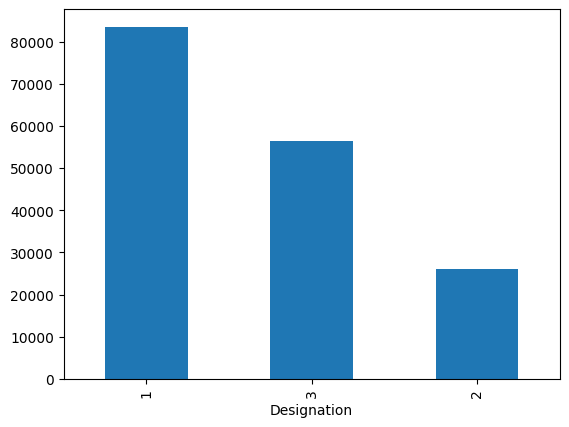

In [155]:
df_cjy['Designation'].value_counts().plot(kind = 'bar')
plt.show()

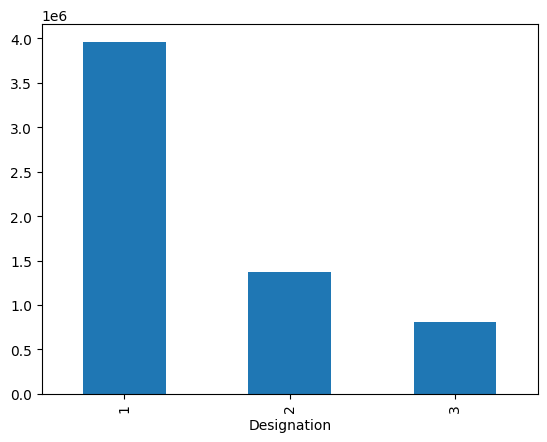

In [157]:
df_cjy.groupby('Designation')['ctc'].mean().plot(kind='bar')
plt.show()

### Manual Clustering on the basis of learner’s company and job position and creating 'Class' feature:

In [75]:
grouped_c_j = df.groupby(['company_hash','job_position'])['ctc'].describe()
grouped_c_j

count          mean           std  \
company_hash job_position                                                     
1bs          android engineer               3.0  7.333333e+05  1.527525e+05   
             backend engineer              19.0  1.550526e+06  7.643405e+05   
             data scientist                 2.0  9.500000e+05  2.121320e+05   
             engineering intern             1.0  1.200000e+06           NaN   
             engineering leadership         2.0  2.500000e+06  1.272792e+06   
...                                         ...           ...           ...   
zxztrtvuo    ios engineer                   1.0  1.200000e+06           NaN   
             member of technical staff 1    1.0  1.200000e+06           NaN   
             nan                           18.0  1.034167e+06  1.020473e+06   
             others                         2.0  4.500000e+05  0.000000e+00   
             software developer intern      1.0  1.200000e+06           NaN   

                                                min        25%        50%  \
company_hash job_position                                                   
1bs          android engineer              600000.0   650000.0   700000.0   
             backend engineer              800000.0  1000000.0  1350000.0   
             data scientist                800000.0   875000.0   950000.0   
             engineering intern           1200000.0  1200000.0  1200000.0   
             engineering leadership       1600000.0  2050000.0  2500000.0   
...                                             ...        ...        ...   
zxztrtvuo    ios engineer                 1200000.0  1200000.0  1200000.0   
             member of technical staff 1  1200000.0  1200000.0  1200000.0   
             nan                           400000.0   450000.0   625000.0   
             others                        450000.0   450000.0   450000.0   
             software developer intern    1200000.0  1200000.0  1200000.0   

                                                75%        max  
company_hash job_position                                       
1bs          android engineer              800000.0   900000.0  
             backend engineer             1705000.0  3750000.0  
             data scientist               1025000.0  1100000.0  
             engineering intern           1200000.0  1200000.0  
             engineering leadership       2950000.0  3400000.0  
...                                             ...        ...  
zxztrtvuo    ios engineer                 1200000.0  1200000.0  
             member of technical staff 1  1200000.0  1200000.0  
             nan                          1237500.0  4500000.0  
             others                        450000.0   450000.0  
             software developer intern    1200000.0  1200000.0  

[23588 rows x 8 columns]

In [76]:
df_cj=df.merge(grouped_c_j, on=['company_hash','job_position'], how='left')

In [77]:
df_cj.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0
2,others,2015,2000000,2020,9,backend engineer,4401.0,2.515897e+06,1.115410e+07,1000.0,335000.0,940000.0,1800000.0,200000000.0
3,ngpgutaxv,2017,700000,2019,7,backend engineer,25.0,1.500000e+06,6.772124e+05,520000.0,1050000.0,1540000.0,1800000.0,3500000.0
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0


In [78]:
df_cj[df_cj.duplicated]

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,count,mean,std,min,25%,50%,75%,max


#### Creating 'Class' feature:

In [79]:
def assign_class(value,value_50,value_75):
    if value>= value_75:
        return 1
    elif value< value_50:
        return 3
    else:
        return 2

In [80]:
df_cj['Class'] = df_cj.apply(lambda x:assign_class(x['ctc'],x['50%'],x['75%']),axis=1)

In [81]:
df_cj.drop(columns= ['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [82]:
df_cj.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Class
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,1
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,3
2,others,2015,2000000,2020,9,backend engineer,1
3,ngpgutaxv,2017,700000,2019,7,backend engineer,3
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1


In [83]:
df_cj.shape

(165870, 7)

In [84]:
df_cj['Class'].value_counts(normalize=True)

Class
3    0.440646
1    0.336131
2    0.223223
Name: proportion, dtype: float64

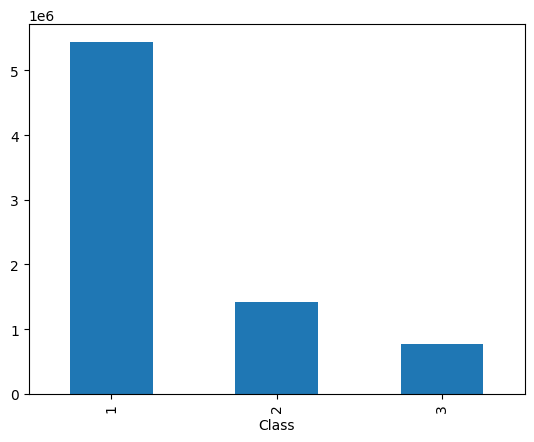

In [158]:
df_cj.groupby('Class')['ctc'].mean().plot(kind='bar')
plt.show()

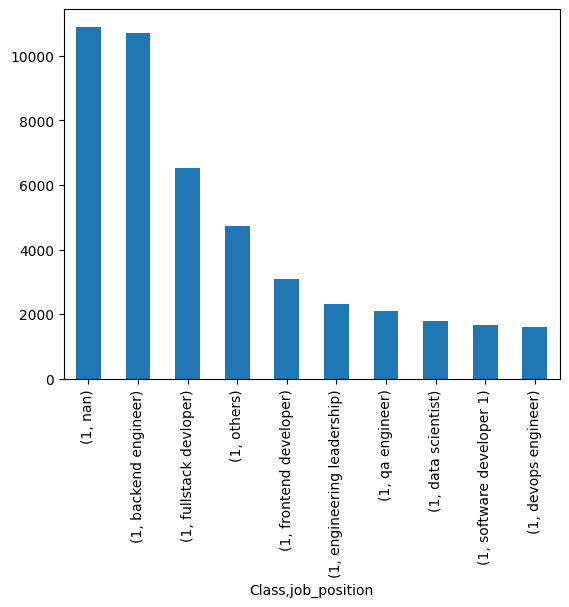

In [159]:
df_cj.groupby('Class')['job_position'].value_counts().head(10).plot(kind='bar')
plt.show()

### Manual Clustering on the basis of learner’s company and creating 'Tier' feature:

In [85]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
grouped_c

,count,mean,std,min,25%,50%,75%,max
company_hash,,,,,,,,
1bs,66.0,1.458939e+06,7.260645e+05,600000.0,925000.0,1325000.0,1600000.0,3750000.0
1bs ntwyzgrgsxto ucn rna,34.0,1.387647e+06,8.828468e+05,100000.0,862500.0,1000000.0,1725000.0,3500000.0
1onaxmo,6.0,1.640000e+06,5.510354e+05,700000.0,1550000.0,1735000.0,1770000.0,2400000.0
20152019,11.0,1.882782e+07,6.009009e+07,336000.0,450000.0,540000.0,900000.0,200000000.0
2018,7.0,8.017143e+05,7.581910e+05,11000.0,155500.0,840000.0,1225000.0,2000000.0
...,...,...,...,...,...,...,...,...
zxxn rna,7.0,9.014286e+05,5.194365e+05,280000.0,500000.0,810000.0,1260000.0,1700000.0
zxyxrtzn,8.0,6.887500e+05,3.221551e+05,330000.0,420000.0,715000.0,812500.0,1300000.0
zxyxrtzn ntwyzgrgsxto,12.0,8.170000e+05,3.943819e+05,50000.0,590000.0,800000.0,992500.0,1500000.0


In [86]:
df_c=df.merge(grouped_c, on=['company_hash'], how='left')

In [87]:
df_c.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1.771000e+06
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,411.0,2.257669e+06,1.209462e+07,10000.0,600000.0,900000.0,1700000.0,2.000000e+08
2,others,2015,2000000,2020,9,backend engineer,28739.0,3.228371e+06,1.664117e+07,15.0,420000.0,900000.0,1710000.0,1.000150e+09
3,ngpgutaxv,2017,700000,2019,7,backend engineer,67.0,1.729478e+06,9.861481e+05,200000.0,1100000.0,1400000.0,2100000.0,4.700000e+06
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1.400000e+06


In [88]:
df_c[df_c.duplicated]

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,count,mean,std,min,25%,50%,75%,max


#### creating 'Tier' feature:

In [89]:
def assign_tier(value,value_50,value_75):
    if value>= value_75:
        return 1
    elif value< value_50:
        return 3
    else:
        return 2

In [90]:
df_c['Tier'] = df_c.apply(lambda x:assign_tier(x['ctc'],x['50%'],x['75%']),axis=1)

In [91]:
df_c.drop(columns= ['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [92]:
df_c.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Tier
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,3
2,others,2015,2000000,2020,9,backend engineer,1
3,ngpgutaxv,2017,700000,2019,7,backend engineer,3
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1


In [93]:
df_c['Tier'].value_counts(normalize=True)

Tier
3    0.479707
1    0.269283
2    0.251010
Name: proportion, dtype: float64

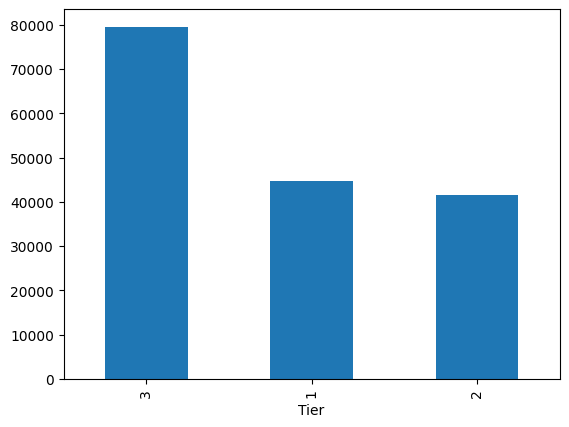

In [160]:
df_c['Tier'].value_counts().plot(kind='bar')
plt.show()

- Almost half of the learners are in Tier 3.

#### Let's merge these dataframes to get designation, class and tier in a single dataframe

In [94]:
df_cjy.shape,df_cj.shape,df_c.shape

((165870, 7), (165870, 7), (165870, 7))

In [95]:
df_merge1 = df_cjy.merge(df_cj, on=['company_hash','orgyear','ctc','job_position','years_of_exp','ctc_updated_year'],how='left')
df_merge1.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,1,1
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,3,3
2,others,2015,2000000,2020,9,backend engineer,1,1
3,ngpgutaxv,2017,700000,2019,7,backend engineer,3,3
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1,1


In [96]:
df_merge2 = df_merge1.merge(df_c, on = ['company_hash','orgyear','ctc','job_position','years_of_exp','ctc_updated_year'],how='left')
df_merge2.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,1,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,3,3,3
2,others,2015,2000000,2020,9,backend engineer,1,1,1
3,ngpgutaxv,2017,700000,2019,7,backend engineer,3,3,3
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1,1,1


In [97]:
data = df_merge2.copy()

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165870 entries, 0 to 165869
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      165870 non-null  object
 1   orgyear           165870 non-null  int64 
 2   ctc               165870 non-null  int64 
 3   ctc_updated_year  165870 non-null  int64 
 4   years_of_exp      165870 non-null  int64 
 5   job_position      165870 non-null  object
 6   Designation       165870 non-null  int64 
 7   Class             165870 non-null  int64 
 8   Tier              165870 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.4+ MB


#### Top 10 employees (earning more than most of the employees in the company)

In [99]:
# Calculate the median earnings for the entire company
company_median_earnings = data['ctc'].median()

# Filter Tier 1 employees who earn more than the company median earnings
tier1_df = data[(data['Tier'] == 1) & (data['ctc'] > company_median_earnings)]

# Sort the filtered Tier 1 employees by 'ctc' in descending order
sorted_tier1_df = tier1_df.sort_values(by='ctc', ascending=False)

# Select the top 10 highest-earning employees
top_10_earners = sorted_tier1_df.head(10)

In [100]:
sorted_tier1_df

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
60884,others,2015,1000150000,2020,9,nan,1,1,1
96418,obvqnuqxdwgb,2018,255555555,2016,6,nan,1,1,1
3205,others,2021,250000000,2020,3,nan,1,1,1
5930,wrvqxcvnt vzvrjnxwo,2015,200000000,2020,9,nan,1,1,1
41736,vbvkgz,2015,200000000,2020,9,qa engineer,1,1,1
...,...,...,...,...,...,...,...,...,...
17174,xzegojo,2016,1060000,2020,8,support engineer,1,1,1
109766,wgszxkvzn,2015,1060000,2021,9,nan,1,1,1
17176,gnytq,2014,1060000,2020,10,others,1,1,1
120932,vzvrjnxwo ihgnxtzn,2018,1058000,2019,6,fullstack devloper,1,1,1


- The above are the learners who are earning more than most of the employees in their companies.

In [101]:
top_10_earners

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
60884,others,2015,1000150000,2020,9,nan,1,1,1
96418,obvqnuqxdwgb,2018,255555555,2016,6,nan,1,1,1
3205,others,2021,250000000,2020,3,nan,1,1,1
5930,wrvqxcvnt vzvrjnxwo,2015,200000000,2020,9,nan,1,1,1
41736,vbvkgz,2015,200000000,2020,9,qa engineer,1,1,1
41732,fxuqg rxbxnta,2022,200000000,2020,2,engineering leadership,1,1,1
65594,others,2018,200000000,2020,6,security leadership,1,1,1
91914,qtrxvzwt lxg xzegwgbb rxbxnta,2015,200000000,2020,9,nan,1,1,1
26922,gnytq,2008,200000000,2020,16,others,1,1,1
22257,ogzj,2017,200000000,2020,7,others,1,1,1


- These are the top 10 earners across all the companies.

#### Top 10 employees of data science in each company earning more than their peers

Let's create a dataframe consisting just data scientists.

In [102]:
top_data_science_df = data[(data['Class'] == 1) & (data['job_position'].str.contains('data scientist', case=False))]
top_data_science_df

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
45,tqxwoogz,2008,2400000,2019,16,data scientist,3,1,1
297,mxkvwhxnj ogrhnxgzo,2018,840000,2019,6,data scientist,1,1,1
298,ihvrwgbb,2019,6000000,2019,5,data scientist,1,1,1
542,sqtvn rtvqzxzs,2011,700000,2021,13,data scientist,1,1,3
685,wgzctqsjnxwo ogrhnxgzo ucn rna,2018,750000,2020,6,data scientist,1,1,1
...,...,...,...,...,...,...,...,...,...
164479,nygbogz qthntqo,2015,1900000,2020,9,data scientist,1,1,1
165093,wxowg,2014,2850000,2016,10,data scientist,1,1,1
165139,utgurt xzntqvwnxct,2017,800000,2019,7,data scientist,1,1,3
165156,gqvwrt,2015,3800000,2020,9,data scientist,2,1,1


In [103]:
# Sorting the data by 'ctc'
sorted_df = top_data_science_df.groupby('company_hash').apply(lambda x: x.sort_values(by='ctc', ascending=False))

In [104]:
# Finding the top 10 earning data scientists in a specific company: tqxwoogz - for example
sorted_df[sorted_df['company_hash']=='tqxwoogz'].head(10)

company_hash  orgyear      ctc  ctc_updated_year  \
company_hash                                                           
tqxwoogz     147537     tqxwoogz     2012  6000000              2019   
             120193     tqxwoogz     2008  3429999              2019   
             104790     tqxwoogz     2001  2980000              2018   
             62103      tqxwoogz     2012  2700000              2019   
             45         tqxwoogz     2008  2400000              2019   
             74764      tqxwoogz     2017  2400000              2019   
             71379      tqxwoogz     2007  2010000              2019   
             50136      tqxwoogz     2015  2000000              2020   

                     years_of_exp      job_position  Designation  Class  Tier  
company_hash                                                                   
tqxwoogz     147537            12    data scientist            1      1     1  
             120193            16    data scientist            1      1     1  
             104790            23    data scientist            1      1     1  
             62103             12    data scientist            2      1     1  
             45                16    data scientist            3      1     1  
             74764              7    data scientist            1      1     1  
             71379             17    data scientist            1      1     1  
             50136              9  data scientist 2            1      1     1

#### Bottom 10 employees of data science in each company earning less than their peers

In [105]:
bottom_data_science_df = data[(data['Class'] == 3) & (data['job_position'].str.contains('data scientist', case=False))]
bottom_data_science_df

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
67,others,2014,480000,2020,10,data scientist,3,3,3
165,xzntrrtwn atoxsz vqtzv rna,2018,470000,2020,6,data scientist,1,3,3
256,vbagwo,2018,500000,2021,6,data scientist,3,3,3
419,btnvwhmt ogenfvqt ucn rna,2015,1000000,2021,9,data scientist,3,3,2
574,vagmt,2016,1570000,2020,8,data scientist,1,3,3
...,...,...,...,...,...,...,...,...,...
165234,others,2019,800000,2021,5,data scientist,2,3,3
165299,nvnv wgzohrnvzwj otqcxwto,2018,450000,2021,6,data scientist,3,3,3
165371,wgszxkvzn,2020,400000,2021,4,data scientist,2,3,3
165439,x vb zgn fgqpxzs,2023,200000,2021,1,data scientist,1,3,3


In [106]:
# Sorting the data by 'ctc'
sorted_df = bottom_data_science_df.groupby('company_hash').apply(lambda x: x.sort_values(by='ctc', ascending=True))

In [107]:
# Finding the least earning data scientists in a specific company: tqxwoogz - for example
sorted_df[sorted_df['company_hash']=='tqxwoogz'].head(10)

company_hash  orgyear     ctc  ctc_updated_year  \
company_hash                                                          
tqxwoogz     109745     tqxwoogz     2017   49000              2017   
             162681     tqxwoogz     2016  489999              2019   
             162892     tqxwoogz     2013  600000              2020   
             66759      tqxwoogz     2016  650000              2019   
             84712      tqxwoogz     2015  730000              2019   
             127080     tqxwoogz     2014  800000              2019   
             55619      tqxwoogz     2007  850000              2019   
             56039      tqxwoogz     2018  900000              2019   
             134324     tqxwoogz     2018  910000              2019   
             105756     tqxwoogz     2015  969999              2019   

                     years_of_exp    job_position  Designation  Class  Tier  
company_hash                                                                 
tqxwoogz     109745             7  data scientist            3      3     3  
             162681             8  data scientist            3      3     3  
             162892            11  data scientist            1      3     3  
             66759              8  data scientist            2      3     3  
             84712              9  data scientist            3      3     3  
             127080            10  data scientist            1      3     3  
             55619             17  data scientist            3      3     3  
             56039              6  data scientist            3      3     3  
             134324             6  data scientist            1      3     3  
             105756             9  data scientist            2      3     2

#### Bottom 10 employees (earning less than most of the employees in the company)

In [108]:
# Calculate the median earnings for the entire company
company_median_earnings = data['ctc'].median()

# Filter Tier 3 employees who earn less than the company median earnings
tier3_df = data[(data['Tier'] == 3) & (data['ctc'] < company_median_earnings)]

# Sort the filtered Tier 3 employees by 'ctc' in ascending order
sorted_tier3_df = tier3_df.sort_values(by='ctc', ascending=True)

# Select the top 10 highest-earning employees
bottom_10_earners = sorted_tier3_df.head(10)

In [109]:
bottom_10_earners

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
110636,xzntqcxtfmxn,2014,2,2019,10,backend engineer,3,3,3
96856,xzntqcxtfmxn,2013,6,2018,11,nan,3,3,3
93517,xzntqcxtfmxn,2013,14,2018,11,nan,1,3,3
149611,others,2016,15,2018,8,nan,3,3,3
148672,others,2019,16,2018,5,nan,3,3,3
46361,others,2020,24,2020,4,others,3,3,3
76246,others,2016,25,2018,8,android engineer,3,3,3
95864,others,2022,200,2021,2,nan,3,3,3
134882,others,2013,300,2019,11,database administrator,3,3,3
68337,others,2018,500,2019,6,co-founder,3,3,3


- These are the least earners over all the companies.

#### Top 10 employees in each company - data science department - having 5/6/7 years of experience earning more than their peers

In [110]:
# Let's create a dataframe of data scientists with 5-7 yrs of experience
exp = data[((data['years_of_exp']==5) | (data['years_of_exp']==6) | (data['years_of_exp']==7))& (data['job_position'].str.contains('data scientist', case=False))]
exp

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
22,others,2018,1350000,2019,6,data scientist,1,2,2
165,xzntrrtwn atoxsz vqtzv rna,2018,470000,2020,6,data scientist,1,3,3
256,vbagwo,2018,500000,2021,6,data scientist,3,3,3
297,mxkvwhxnj ogrhnxgzo,2018,840000,2019,6,data scientist,1,1,1
298,ihvrwgbb,2019,6000000,2019,5,data scientist,1,1,1
...,...,...,...,...,...,...,...,...,...
165139,utgurt xzntqvwnxct,2017,800000,2019,7,data scientist,1,1,3
165169,gunhb,2019,1150000,2020,5,data scientist,1,3,3
165234,others,2019,800000,2021,5,data scientist,2,3,3
165299,nvnv wgzohrnvzwj otqcxwto,2018,450000,2021,6,data scientist,3,3,3


In [111]:
# Sorting the data by 'ctc'
sorted_df = exp.groupby('company_hash').apply(lambda x: x.sort_values(by='ctc', ascending=False))

In [112]:
# Finding the highest earning data scientists in a specific company: 'others' - for example
sorted_df[sorted_df['company_hash']=='others'].head(10)

company_hash  orgyear        ctc  ctc_updated_year  \
company_hash                                                             
others       2629         others     2019  199800000              2020   
             135784       others     2018   10000000              2019   
             34607        others     2019    8500000              2020   
             38482        others     2018    8000000              2020   
             149332       others     2018    7800000              2021   
             140837       others     2018    7000000              2019   
             163498       others     2018    6300000              2021   
             102082       others     2018    6300000              2020   
             21379        others     2019    6000000              2020   
             126822       others     2018    5100000              2015   

                     years_of_exp    job_position  Designation  Class  Tier  
company_hash                                                                 
others       2629               5  data scientist            1      1     1  
             135784             6  data scientist            1      1     1  
             34607              5  data scientist            1      1     1  
             38482              6  data scientist            1      1     1  
             149332             6  data scientist            1      1     1  
             140837             6  data scientist            1      1     1  
             163498             6  data scientist            1      1     1  
             102082             6  data scientist            1      1     1  
             21379              5  data scientist            1      1     1  
             126822             6  data scientist            1      1     1

#### Top 10 companies (based on their CTC)

In [113]:
company_ctc = data.groupby('company_hash')['ctc'].mean().reset_index()
company_ctc_sorted = company_ctc.sort_values(by='ctc', ascending=False)
top_10_companies = company_ctc_sorted.head(10)
print("Top 10 companies based on their CTC:")
print(top_10_companies)

Top 10 companies based on their CTC:
                company_hash           ctc
2788              xzaxvmhrro  5.374143e+07
1204            obvqnuqxdwgb  4.395259e+07
677   ho tzsxzttqxzs wgbuvzj  4.348714e+07
544           fgqraihvzn rrw  3.495833e+07
435                  egdwgzz  3.423250e+07
1280                     omx  3.412333e+07
2737           xqgz bghznvxz  3.395833e+07
1080         ntvwy egq xzaxv  3.232771e+07
1184       nyt sqtvn wghqoto  3.215200e+07
1531                   psxor  3.194560e+07


#### Top 2 positions in every company (based on their CTC)

In [114]:
df_merge2['rank'] = df_merge2.groupby('company_hash')['ctc'].rank(method='dense', ascending=False)
top_2_positions = df_merge2[df_merge2['rank'] <= 2]
top_2_positions_sorted = top_2_positions.sort_values(by=['company_hash', 'rank'])
top_2_positions = pd.DataFrame(top_2_positions_sorted)
top_2_positions

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier,rank
73691,1bs,2016,3750000,2020,8,backend engineer,1,1,1,1.0
95936,1bs,2006,3400000,2019,18,nan,1,1,1,2.0
134351,1bs,2006,3400000,2019,18,engineering leadership,1,1,1,2.0
82293,1bs ntwyzgrgsxto ucn rna,2015,3500000,2021,9,backend engineer,1,1,1,1.0
123866,1bs ntwyzgrgsxto ucn rna,2015,3500000,2021,9,nan,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
106033,zxyxrtzn ntwyzgrgsxto,2011,1300000,2019,13,backend engineer,1,1,1,2.0
142257,zxzlvwvqn,2012,5000000,2019,12,nan,1,1,1,1.0
162989,zxzlvwvqn,2011,4800000,2020,13,product manager,1,1,1,2.0
67311,zxztrtvuo,2015,11950000,2020,9,backend engineer,1,1,1,1.0


### Clustering Model building

In [115]:
# Let's create a copy of the dataframe
x = data.copy()

In [116]:
x.shape

(165870, 9)

In [117]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165870 entries, 0 to 165869
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      165870 non-null  object
 1   orgyear           165870 non-null  int64 
 2   ctc               165870 non-null  int64 
 3   ctc_updated_year  165870 non-null  int64 
 4   years_of_exp      165870 non-null  int64 
 5   job_position      165870 non-null  object
 6   Designation       165870 non-null  int64 
 7   Class             165870 non-null  int64 
 8   Tier              165870 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.4+ MB


#### Encoding the company and job position columns

In [118]:
from sklearn import preprocessing

In [119]:
label_encoder = preprocessing.LabelEncoder()
x['company_hash']= label_encoder.fit_transform(x['company_hash'])

x['job_position']= label_encoder.fit_transform(x['job_position'])

In [120]:
x['company_hash'].unique()

array([  64, 1618, 1328, ..., 1377,  164, 1239])

In [121]:
x['job_position'].unique()

array([341, 220, 102, 323, 252, 152, 217, 391, 192, 158, 190,  21, 413,
       551, 664, 450, 175, 370, 378, 131, 311, 367, 667, 101, 163, 454,
       409,  32, 720,  60,   7, 569, 641, 644, 581, 714, 469, 552, 385,
       303, 563, 439, 178,  25, 358, 107, 464,  39, 223, 690, 293, 579,
         0, 242, 507, 660, 337, 474, 715, 248, 468, 332,  78, 694, 496,
       200,  50, 591, 202,  56, 492, 366, 582,  53, 557, 245, 564, 463,
       368, 188, 275, 622, 196,  69, 118, 221, 437, 109, 443, 592, 471,
       244, 327, 106,  57, 262, 719, 425, 283, 738, 384, 291, 595,  17,
       499,  91, 429, 319, 113, 504, 380, 683, 309, 583, 674,  80, 729,
       182, 417, 693, 479, 203, 103, 419, 518, 553, 369, 120, 467, 428,
       460, 354, 398, 606,  95, 389, 455, 167, 524, 438,  79, 136, 665,
       689,  77, 235, 403, 286, 540, 725, 624, 315, 517, 342, 387, 344,
       205, 330, 421, 191, 410, 295, 587, 621, 544, 329, 197, 726, 476,
       559, 273, 301, 727, 336, 128, 481, 638, 117, 153, 477, 54

In [122]:
x.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier
0,64,2016,1100000,2020,8,341,1,1,2
1,1618,2018,449999,2019,6,220,3,3,3
2,1328,2015,2000000,2020,9,102,1,1,1
3,1008,2017,700000,2019,7,102,3,3,3
4,1659,2017,1400000,2019,7,220,1,1,1


- Company and job position are encoded.

In [123]:
# Let's drop columns 'orgyear' and 'ctc_updated_year' as we already created 'years_of_exp' feature.
x.drop(columns = ['orgyear','ctc_updated_year'], inplace = True)

In [124]:
x.isnull().sum()

company_hash    0
ctc             0
years_of_exp    0
job_position    0
Designation     0
Class           0
Tier            0
dtype: int64

#### Standardizing the dataset

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()
x[['ctc']] = scaler.fit_transform(x[['ctc']])

In [127]:
x

,company_hash,ctc,years_of_exp,job_position,Designation,Class,Tier
0,64,0.001100,8,341,1,1,2
1,1618,0.000450,6,220,3,3,3
2,1328,0.002000,9,102,1,1,1
3,1008,0.000700,7,102,3,3,3
4,1659,0.001400,7,220,1,1,1
...,...,...,...,...,...,...,...
165865,2323,0.000220,16,323,1,3,3
165866,690,0.000500,7,323,3,3,3
165867,2351,0.000700,3,323,2,3,3
165868,3028,0.005099,5,323,1,1,1


#### Using Elbow method to find reasonable no.of clusters

In [128]:
from sklearn.cluster import KMeans

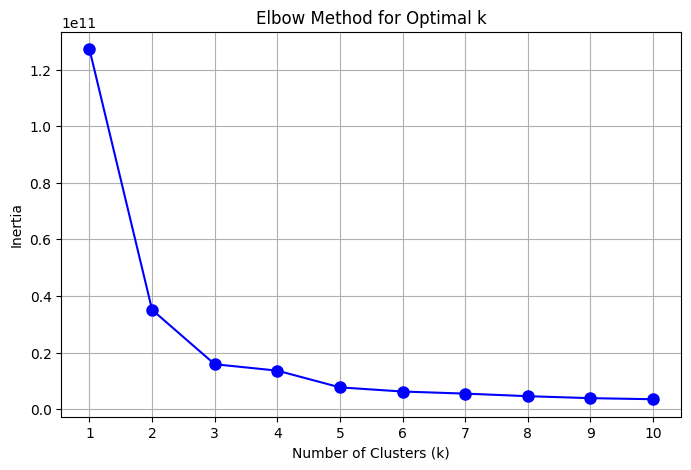

In [129]:
k_range = range(1, 11)

inertia = []

# Fitting K-Means for each k and calculating inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(x)  
    inertia.append(kmeans.inertia_) 

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### KMeans Clustering

In [130]:
# Number of clusters
n_clusters = 3  

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans
kmeans.fit(x)

# Get cluster labels
labels = kmeans.labels_

# Print cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

# Print inertia
print("Inertia:", kmeans.inertia_)


Cluster centers:
 [[1.38170068e+03 2.73894048e-03 9.54800975e+00 2.43903041e+02
  1.91724887e+00 2.12930781e+00 2.21687313e+00]
 [2.59480170e+03 2.32975263e-03 8.89117454e+00 2.50528323e+02
  1.80394762e+00 2.09431422e+00 2.20932334e+00]
 [4.73793918e+02 2.27665902e-03 9.13397419e+00 2.40200416e+02
  1.74597448e+00 2.07755636e+00 2.20128817e+00]]
Inertia: 15866005961.416506


In [131]:
data['kmeans_label'] = kmeans.fit_predict(x)

In [132]:
data

,company_hash,orgyear,ctc,ctc_updated_year,years_of_exp,job_position,Designation,Class,Tier,kmeans_label
0,atrgxnnt xzaxv,2016,1100000,2020,8,others,1,1,2,2
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,2019,6,fullstack devloper,3,3,3,0
2,others,2015,2000000,2020,9,backend engineer,1,1,1,0
3,ngpgutaxv,2017,700000,2019,7,backend engineer,3,3,3,0
4,qxen sqghu,2017,1400000,2019,7,fullstack devloper,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
165865,vuurt xzw,2008,220000,2019,16,nan,1,3,3,1
165866,husqvawgb,2017,500000,2020,7,nan,3,3,3,2
165867,vwwgrxnt,2021,700000,2021,3,nan,2,3,3,1
165868,zgn vuurxwvmrt,2019,5100000,2019,5,nan,1,1,1,1


#### Let's check characteristics of different clusters

In [133]:
data['kmeans_label'].value_counts(normalize=True)

kmeans_label
0    0.410767
1    0.340218
2    0.249014
Name: proportion, dtype: float64

In [134]:
data.groupby('kmeans_label')['ctc'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans_label,,,,,,,,
0,68134.0,2.739354e+06,1.404919e+07,15.0,550000.0,1000000.0,1800000.0,1.000150e+09
1,56432.0,2.330192e+06,1.144545e+07,2.0,600000.0,1000000.0,1741250.0,2.000000e+08
2,41304.0,2.276868e+06,1.000673e+07,600.0,700000.0,1200000.0,2020000.0,2.000000e+08


In [135]:
data.groupby('kmeans_label')['years_of_exp'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans_label,,,,,,,,
0,68134.0,9.547876,4.620425,0.0,6.0,9.0,12.0,54.0
1,56432.0,8.891391,4.219608,0.0,6.0,8.0,11.0,54.0
2,41304.0,9.133837,4.165156,0.0,6.0,8.0,11.0,47.0


- Years of experience seems to be similar in all the clusters where as mean ctc is higher in cluster 0.

In [136]:
pd.crosstab(index = data["kmeans_label"],columns = data["years_of_exp"])

years_of_exp,0,1,2,3,4,5,6,7,8,9,...,40,42,43,45,47,48,51,52,53,54
kmeans_label,,,,,,,,,,,,,,,,,,,,,
0,21,94,308,1054,3477,6144,7420,7391,7587,6735,...,2,1,1,1,0,1,1,1,1,1
1,21,132,416,1343,3517,5733,6732,6480,6224,5780,...,0,1,0,0,0,0,0,0,0,1
2,1,18,92,507,2239,4195,5206,4438,4719,4403,...,1,2,0,0,1,0,0,0,0,0


In [137]:
data.groupby('kmeans_label')['ctc'].mean()

kmeans_label
0    2.739354e+06
1    2.330192e+06
2    2.276868e+06
Name: ctc, dtype: float64

In [139]:
# Creating separate dataframe for different clusters
kmeans_label_0 = data[data['kmeans_label']==0]
kmeans_label_1 = data[data['kmeans_label']==1]
kmeans_label_2 = data[data['kmeans_label']==2]

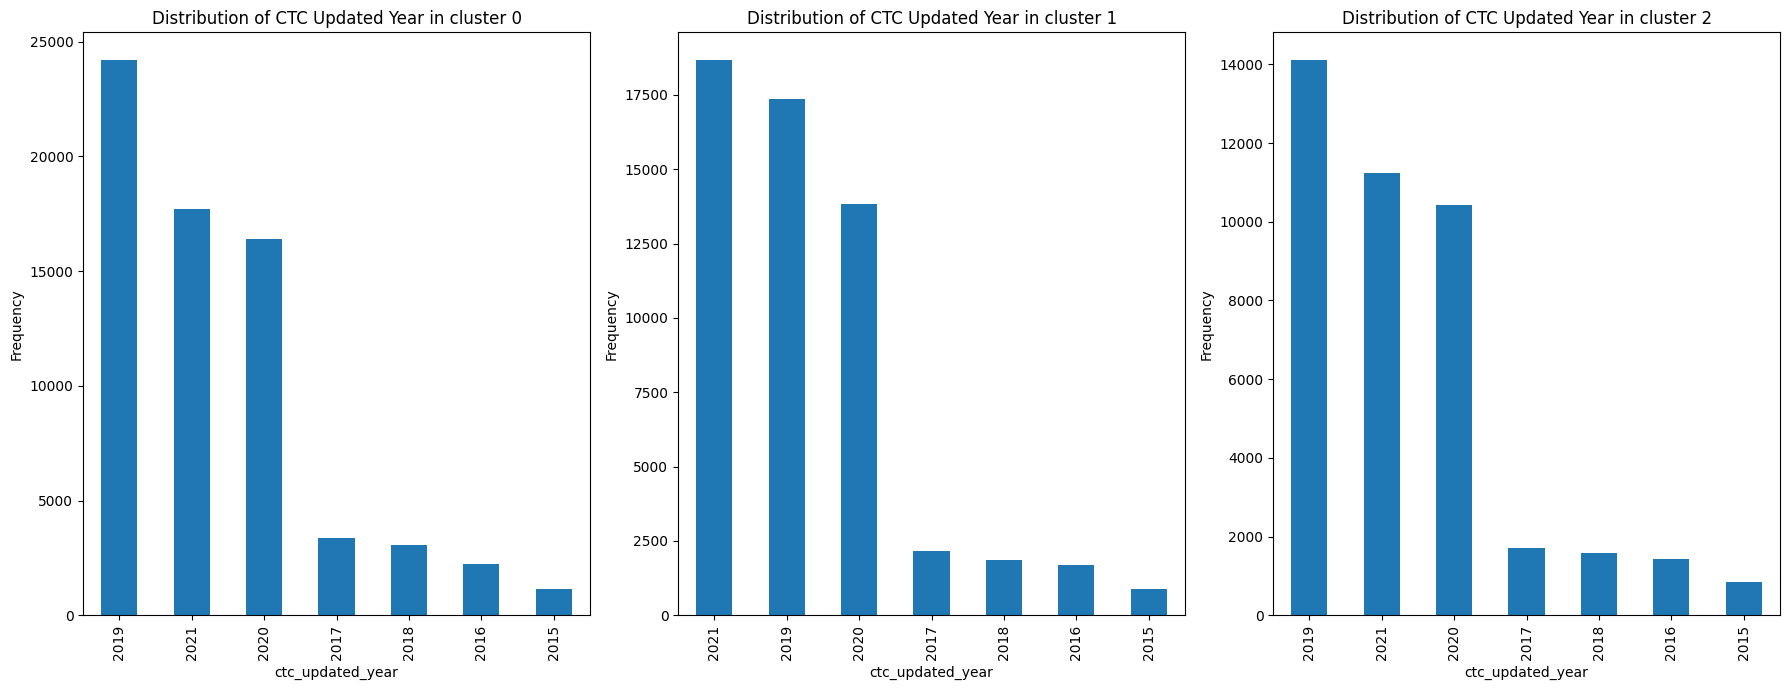

In [140]:
plt.figure(figsize=(18, 7))

# First subplot
plt.subplot(1, 3, 1)
kmeans_label_0['ctc_updated_year'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of CTC Updated Year in cluster 0')

# Second subplot
plt.subplot(1, 3, 2)
kmeans_label_1['ctc_updated_year'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of CTC Updated Year in cluster 1')

# Third subplot
plt.subplot(1, 3, 3)
kmeans_label_2['ctc_updated_year'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of CTC Updated Year in cluster 2')

plt.tight_layout()
plt.show()


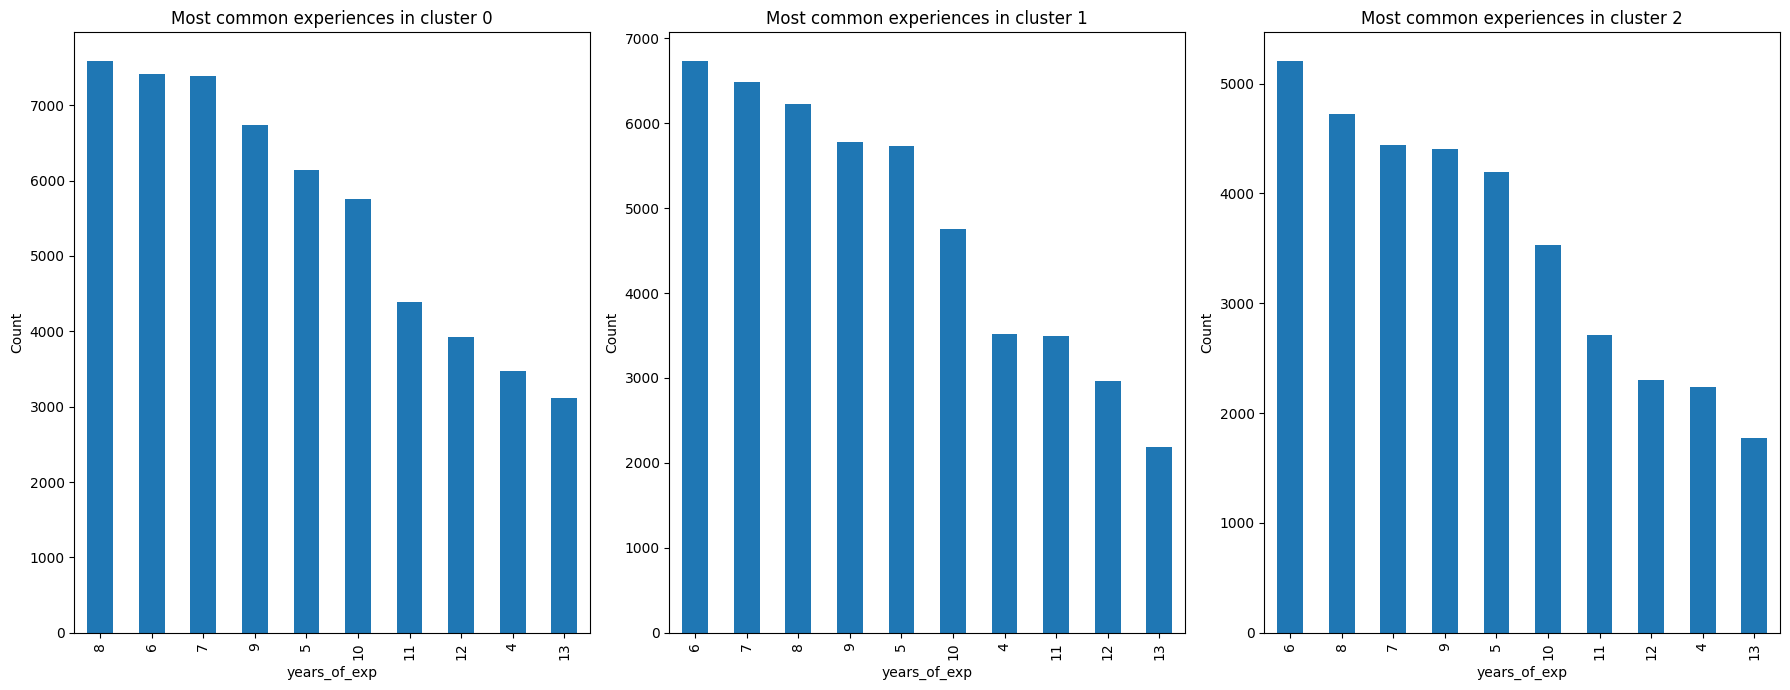

In [141]:
plt.figure(figsize=(18, 7))

# First subplot
plt.subplot(1, 3, 1)
kmeans_label_0['years_of_exp'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')
plt.title('Most common experiences in cluster 0')

# Second subplot
plt.subplot(1, 3, 2)
kmeans_label_1['years_of_exp'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')
plt.title('Most common experiences in cluster 1')

# Third subplot
plt.subplot(1, 3, 3)
kmeans_label_2['years_of_exp'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')
plt.title('Most common experiences in cluster 2')

plt.tight_layout()
plt.show()

- Most common experience is similar in all clusters with slight changes.

In [164]:
import plotly.express as px

In [175]:
import webbrowser

In [177]:
# Select only numeric columns and kmeans_label for grouping
numeric_columns = ['orgyear', 'ctc', 'ctc_updated_year', 'years_of_exp']

# Calculate mean values for each numeric feature grouped by kmeans_label
mean_df = data.groupby('kmeans_label')[numeric_columns].mean().reset_index()

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(mean_df[numeric_columns])

# Create a DataFrame with normalized values
normalized_df = pd.DataFrame(normalized_values, columns=numeric_columns)
normalized_df['kmeans_label'] = mean_df['kmeans_label']

# Reshape the data for polar plot
polar_data = normalized_df.melt(id_vars=['kmeans_label'], var_name='variable', value_name='value')

# Plot the polar plot
fig = px.line_polar(polar_data, r='value', theta='variable', color='kmeans_label', line_close=True, height=700, width=800)

# Save the plot as an HTML file and open it in the web browser
file_path = 'polar_plot.html'
fig.write_html(file_path)
webbrowser.open(file_path)

True

#### Hierarchical Clustering

In [142]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [143]:
hc = x.sample(1000)

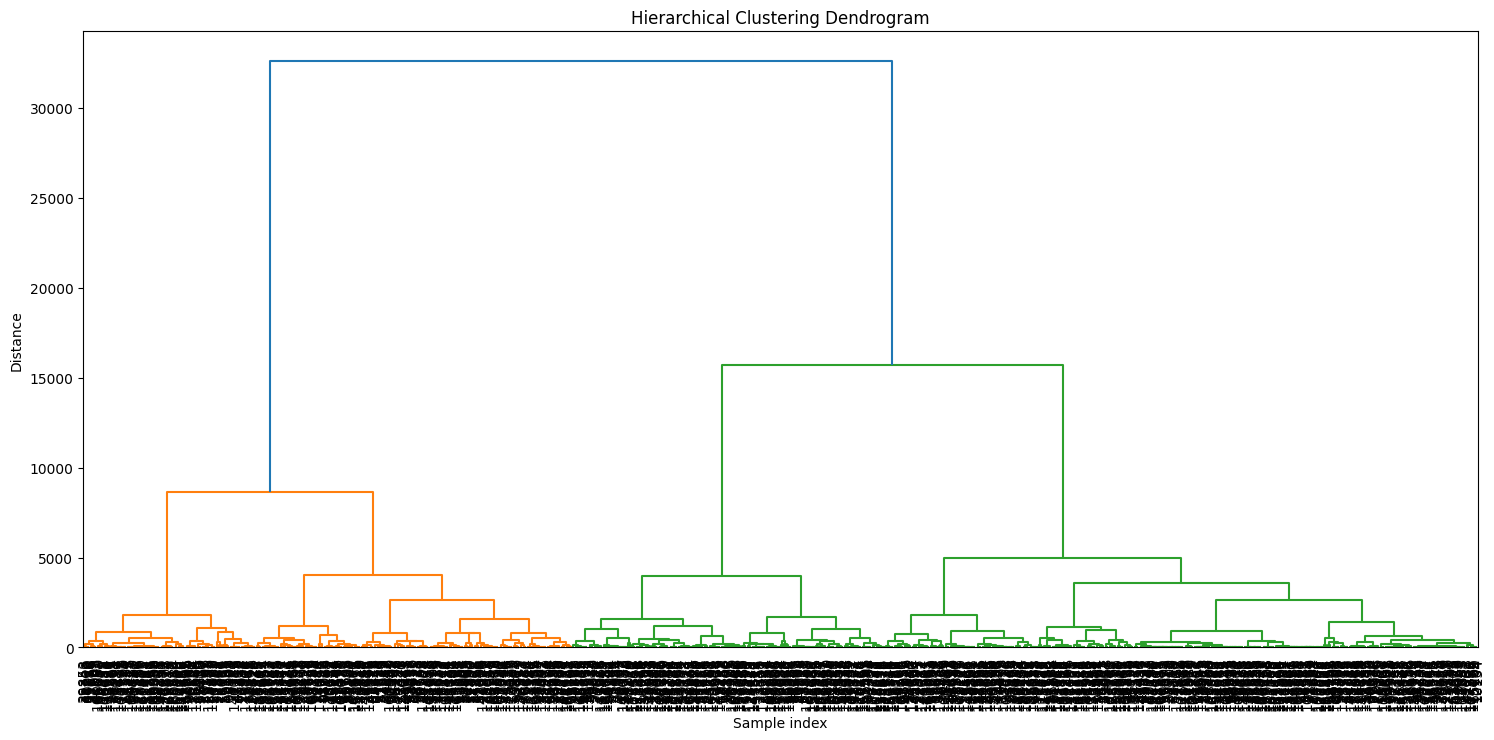

In [144]:
# Perform hierarchical clustering
Z = linkage(hc, method='ward')

# Plot the dendrogram
plt.figure(figsize=(18, 8))
dendrogram(Z, labels=hc.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [145]:
from sklearn.cluster import AgglomerativeClustering

In [146]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(hc)

AgglomerativeClustering(n_clusters=3)

In [147]:
hc['HC_label'] = model.labels_

In [148]:
hc

,company_hash,ctc,years_of_exp,job_position,Designation,Class,Tier,HC_label
30244,1111,0.00045,5,323,1,3,3,1
40578,1328,0.00057,7,102,3,3,3,1
105647,463,0.00040,8,217,3,3,3,2
114872,1979,0.00080,11,323,1,3,3,0
81528,1328,0.00102,11,21,2,2,2,1
...,...,...,...,...,...,...,...,...
24279,69,0.00200,12,323,1,1,2,2
101887,2135,0.00130,9,102,1,1,1,0
143018,463,0.00084,5,341,2,2,2,2
150149,2805,0.00065,4,323,3,3,3,0


- These cluster labels cannot be added to the main dataframe as this was performed only on a sample of the original data.

### Recommendations:

- Different companies and roles have unique needs. Offer customized courses or modules to prepare learners for high-paying jobs in top-tier companies.
- Showcase success stories of alumni with high salaries to inspire current learners and demonstrate the effectiveness of Scaler’s programs.
- Establish partnerships with top companies to offer internships, mentorship programs, and direct placements, enhancing the credibility of Scaler’s programs.
- Offer advanced career support services, such as executive coaching and leadership training, for learners with significant experience to help them reach higher salary levels.
- Continuously update the curriculum to include the latest technologies and industry trends, ensuring that the content remains relevant and valuable.
- Create targeted programs to help learners with lower salaries boost their skills, get ready for interviews, and get career advice to earn higher salaries.
- Collect feedback from learners on their job placement experiences and salary improvements to refine programs and provide more targeted support.